In [119]:
import numpy as np

class Operation(object):
    def __init__(self, input_nodes=[]):
        self.type = 'operation'
        self.input_nodes = input_nodes
        self.output_nodes = [input_node.output_nodes for input_node in input_nodes]
        _default_graph.operations.append(self)
    
class add(Operation):
    def __init__(self, a, b):
        super(add, self).__init__([a,b])
    def compute(self, a, b):
        return a+b
    
class dot(Operation):
    def __init__(self, a, b):
        super(dot, self).__init__([a,b])
    def compute(self, a, b):
        return a.dot(b)
    
class multiply(Operation):
    def __init__(self, a, b):
        super(multiply, self).__init__([a,b])
    def compute(self, a, b):
        return a*b
    
class sigmoid(Operation):
    def __init__(self, x):
        super(sigmoid, self).__init__([x])
    def compute(self, x):
        return 1./(1.+np.exp(-x))
    
class softmax(Operation):
    def __init__(self, x):
        super(softmax, self).__init__([x])
    def compute(self, x):
        return np.exp(x)/np.sum(np.exp(x),axis=1)[:,None]
    
class log(Operation):
    def __init__(self, x):
        super(log, self).__init__([x])
    def compute(self, x):
        return np.log(x)
    
class negative(Operation):
    def __init__(self, x):
        super(negative, self).__init__([x])
    def compute(self, x):
        return -x
    
class reduce_sum(Operation):
    def __init__(self, X, axis=None):
        super(reduce_sum, self).__init__([X])
        self.axis = axis
    def compute(self, X):
        return np.sum(X, self.axis)

class Variable():
    def __init__(self, value=None):
        self.type = 'variable'
        self.value = value
        self.output_nodes = []
        _default_graph.variables.append(self)
    
class Placeholder():
    def __init__(self):
        self.type = 'placeholder'
        self.output_nodes = []
        _default_graph.placeholders.append(self)
        
class Graph():
    def __init__(self):
        self.operations = []
        self.variables = []
        self.placeholders = []
    def as_default(self):
        global _default_graph
        _default_graph = self       
        
def computation_order(operation):
    order = []
    def traverse_postorder(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                traverse_postorder(input_node)
        order.append(node)
    traverse_postorder(operation)
    return order
        
class Session():
    def run(self, operation, placeholder_values={}):
        order = computation_order(operation)
        for node in order:
            if node.type == 'variable':
                node.output = node.value
            elif node.type == 'placeholder':
                node.output = placeholder_values[node]
            elif node.type == 'operation':
                node.inputs = [input_node.output for input_node in node.input_nodes]
                node.output = node.compute(*node.inputs)
            
            if type(node.output) == list:
                node.output = np.array(node.output)
        return operation.output

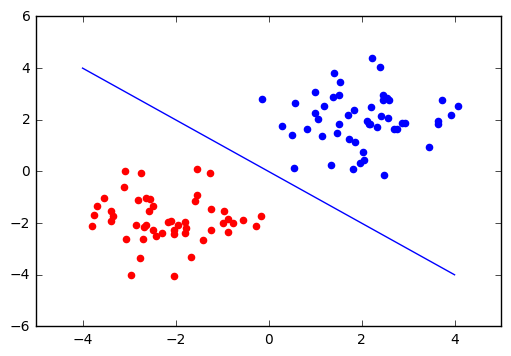

In [120]:
import matplotlib.pyplot as plt
# Create red points centered at (-2, -2)
red_points = np.random.randn(50, 2) - 2*np.ones((50, 2))

# Create blue points centered at (2, 2)
blue_points = np.random.randn(50, 2) + 2*np.ones((50, 2))

# Plot the red and blue points
plt.scatter(red_points[:,0], red_points[:,1], color='red')
plt.scatter(blue_points[:,0], blue_points[:,1], color='blue')

# Plot a line y = -x
x_axis = np.linspace(-4, 4, 100)
y_axis = -x_axis
plt.plot(x_axis, y_axis)
plt.show()

In [121]:
# Create a new graph
Graph().as_default()

X = Placeholder()
c = Placeholder()

W = Variable([
    [1, -1],
    [1, -1]
])
b = Variable([0, 0])
p = softmax(add(dot(X, W), b))

# Cross-entropy loss
J = negative(reduce_sum(reduce_sum(multiply(c, log(p)), axis=1)))

session = Session()
print(session.run(J, {
    X: np.concatenate((blue_points, red_points)),
    c:
        [[1, 0]] * len(blue_points)
        + [[0, 1]] * len(red_points)

}))
#next: http://www.deepideas.net/deep-learning-from-scratch-iv-gradient-descent-and-backpropagation/

0.598890305352


In [125]:
#
[[1, 0]]*2

[[1, 0], [1, 0]]

In [123]:
[[1, 0]] * len(blue_points) + [[0, 1]] * len(red_points)

[[1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1]]

In [69]:
a = np.array([[1,2,3,4]])

In [78]:
np.exp(a)/np.sum(np.exp(a),axis=1)[:,None]

array([[ 0.0320586 ,  0.08714432,  0.23688282,  0.64391426]])